In [1]:
import pandas as pd
import sqlite3
import pprint

In [2]:
conn = sqlite3.connect("C:/Users/User/Documents/UZH/Semester_4/Social Computing/Untitled_Folder/db.db")
cur = conn.cursor()


In [4]:
#For the Scala


actions = ["normalized_tweet", "normalized_retweet", "normalized_like", "normalized_reply"]



cur.execute("select count(normalized_tweet_count) from videos;")
normalized_tweet_count = cur.fetchall()

cur.execute("select sum(normalized_tweet_count) from videos;")
normalized_tweet_sum = cur.fetchall()

range_tweet = normalized_tweet_sum[0][0]/normalized_tweet_count[0][0]*100000

print (range_tweet)


#_________


cur.execute("select count(normalized_retweet_count) from videos;")
normalized_retweet_count = cur.fetchall()

cur.execute("select sum(normalized_retweet_count) from videos;")
normalized_retweet_sum = cur.fetchall()

range_retweet = normalized_retweet_sum[0][0]/normalized_retweet_count[0][0]*100000

print (range_retweet)


#_________


cur.execute("select count(normalized_like_count) from videos;")
normalized_like_count = cur.fetchall()

cur.execute("select sum(normalized_like_count) from videos;")
normalized_like_sum = cur.fetchall()

range_like = normalized_like_sum[0][0]/normalized_like_count[0][0]*100000

print (range_like)


#_________


cur.execute("select count(normalized_reply_count) from videos;")
normalized_reply_count = cur.fetchall()

cur.execute("select sum(normalized_reply_count) from videos;")
normalized_reply_sum = cur.fetchall()

range_reply = normalized_reply_sum[0][0]/normalized_reply_count[0][0]*100000


print (range_reply)



3.4359706759078805
5.404133273788712
102.41379199202518
3.2947007337643544


In [5]:
#Calculate Values for each category


categories = ["\'Gaming\'", "\'Comedy\'", "\'Sports\'", "\'Kids\'", "\'How-To\'", "\'Pets\'", "\'Science\'"]

normalized_tweet = []
normalized_retweet = []
normalized_like = []
normalized_reply = []

#normalized_tweet from all categories
for i in categories:
    temp_string = "SELECT count(normalized_tweet_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)
    temp_count = cur.fetchall()[0][0]
    
    
    temp_string = "SELECT sum(normalized_tweet_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)   
    normalized_tweet.append (cur.fetchall()[0][0]/temp_count*100000)
   
print ("Normalized_tweets: ")
print (normalized_tweet)




#normalized_retweet from all categories
for i in categories:
    temp_string = "SELECT count(normalized_retweet_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)
    temp_count = cur.fetchall()[0][0]
    
    
    temp_string = "SELECT sum(normalized_retweet_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)   
    normalized_retweet.append (cur.fetchall()[0][0]/temp_count*100000)

print ("Normalized_retweets: ")
print (normalized_retweet)




#normalized_like from all categories
for i in categories:
    temp_string = "SELECT count(normalized_like_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)
    temp_count = cur.fetchall()[0][0]
    
    
    temp_string = "SELECT sum(normalized_like_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)   
    normalized_like.append (cur.fetchall()[0][0]/temp_count*100000)

print ("Normalized_like: ")
print (normalized_like)



#normalized_reply from all categories
for i in categories:
    temp_string = "SELECT count(normalized_reply_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)
    temp_count = cur.fetchall()[0][0]
    
    
    temp_string = "SELECT sum(normalized_reply_count)from videos WHERE category = "
    exe_string = str(temp_string + i +";")
    
    cur.execute(exe_string)   
    normalized_reply.append (cur.fetchall()[0][0]/temp_count*100000)

print ("Normalized_reply: ")
print (normalized_reply)




Normalized_tweets: 
[6.060317214382835, 3.3583065149998115, 5.893710356872245, 0.5251867404972584, 0.7029987171742973, 3.466932912504745, 2.667409605406447]
Normalized_retweets: 
[1.6063112962995432, 8.11843328732204, 4.090612297414139, 9.888774412513294, 0.8642348717146398, 4.549666658369187, 12.191082622564974]
Normalized_like: 
[66.53370754869246, 322.32967923981874, 30.150047965928415, 37.548511194956525, 33.75021671470104, 10.186156981300059, 183.68881924763005]
Normalized_reply: 
[1.333650073294227, 6.751634626816353, 1.056024731091105, 0.3725313943979464, 0.7294900910141267, 0.8022918731861035, 12.213993725220401]


In [119]:
#Radar Graph Logic

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)


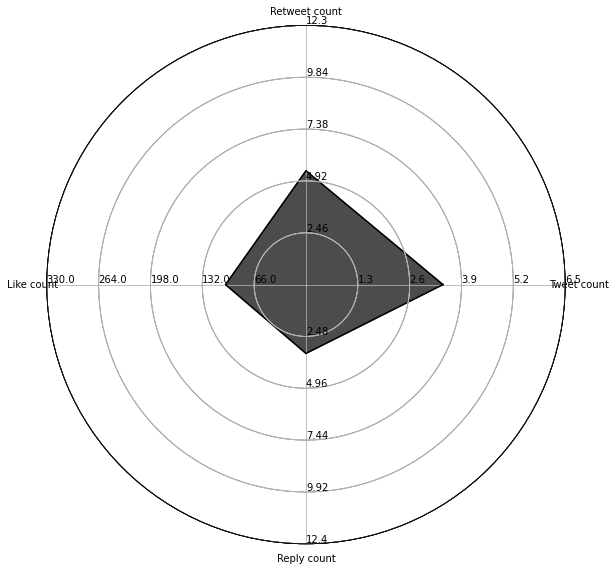

In [137]:
#Average Distribution of interaction across all categories

variables = ("Tweet count", "Retweet count", "Like count", "Reply count")
data = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, 'k')
radar.fill(data, alpha=0.7, color = "black")

plt.show()

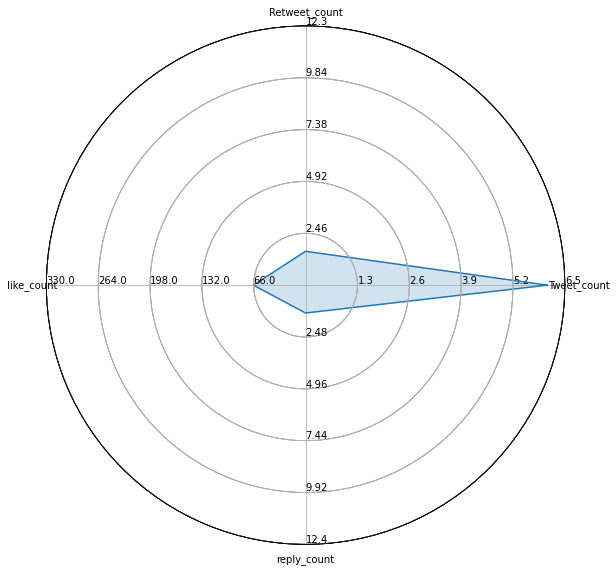

In [57]:
#Visualization

#Gaming
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[0], normalized_retweet[0], normalized_like[0], normalized_reply[0])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1)
radar.fill(data1, alpha=0.2)

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

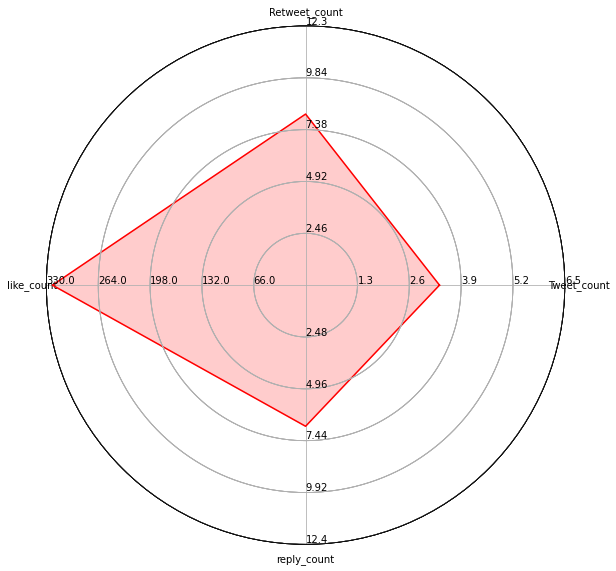

In [161]:
#Comedy
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data = (normalized_tweet[1], normalized_retweet[1], normalized_like[1], normalized_reply[1])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, 'r')
radar.fill(data, alpha=0.2, color = "red")
plt.show()


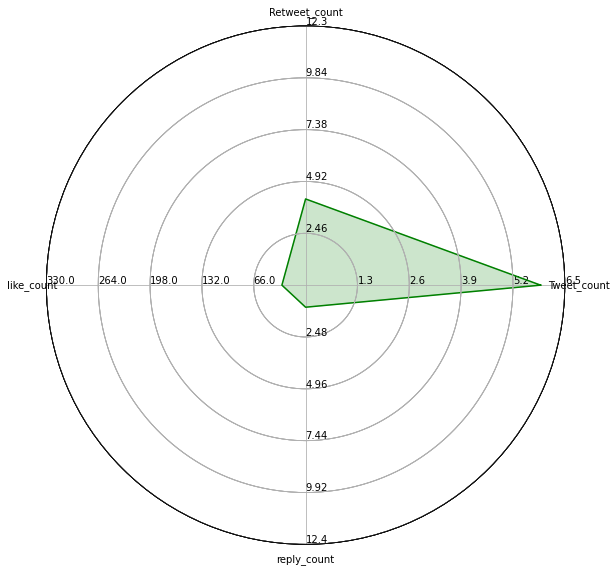

In [139]:
#sports
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data = (normalized_tweet[2], normalized_retweet[2], normalized_like[2], normalized_reply[2])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, 'g')
radar.fill(data, alpha=0.2, color = "green")
plt.show()


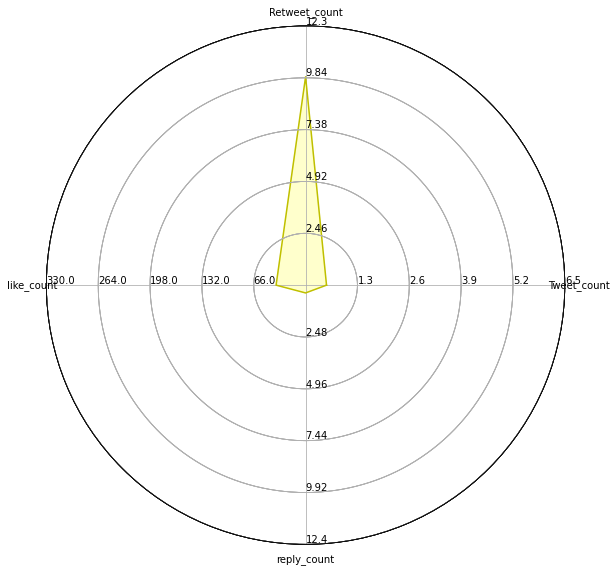

In [140]:
#Kids
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data = (normalized_tweet[3], normalized_retweet[3], normalized_like[3], normalized_reply[3])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, 'y')
radar.fill(data, alpha=0.2, color = "yellow")
plt.show()

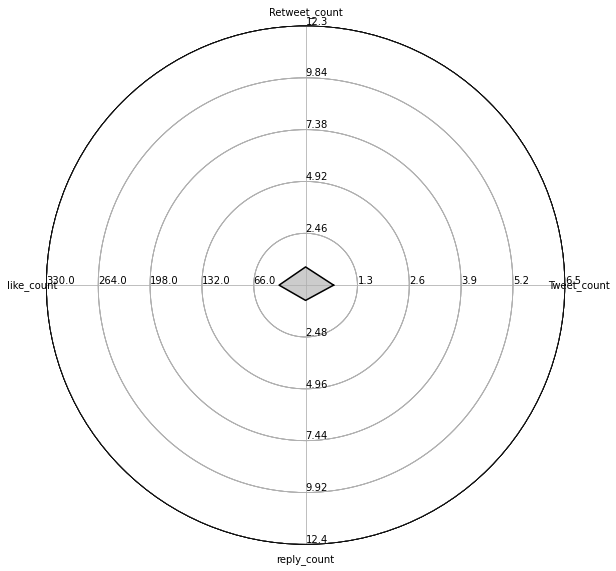

In [141]:
#How-To
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data = (normalized_tweet[4], normalized_retweet[4], normalized_like[4], normalized_reply[4])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, 'k')
radar.fill(data, alpha=0.2, color = "black")
plt.show()


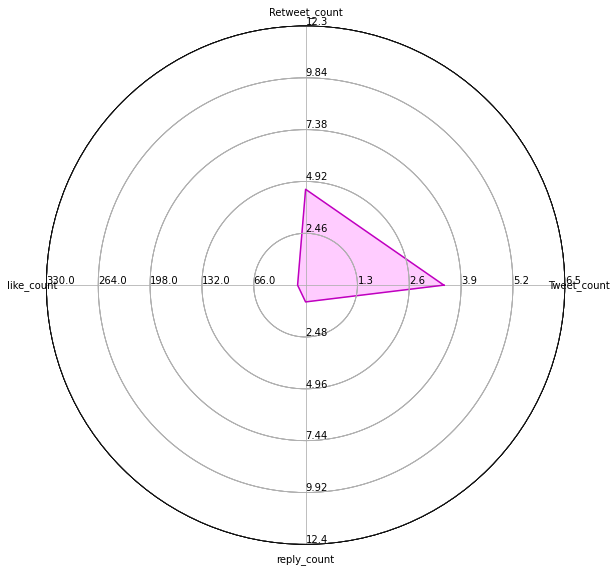

In [142]:
#Pets
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data = (normalized_tweet[5], normalized_retweet[5], normalized_like[5], normalized_reply[5])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, 'm')
radar.fill(data, alpha=0.2, color = "magenta")
plt.show()



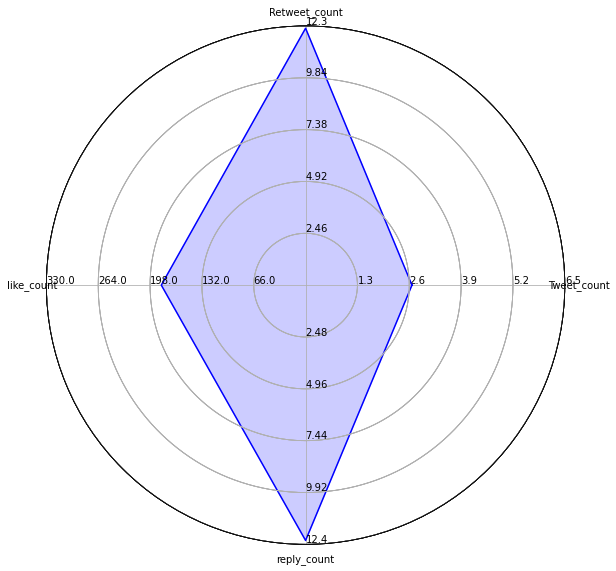

In [143]:
#Science
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data = (normalized_tweet[6], normalized_retweet[6], normalized_like[6], normalized_reply[6])
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data,'b')
radar.fill(data, alpha=0.2, color = "blue")
plt.show()

In [ ]:
#With Avg

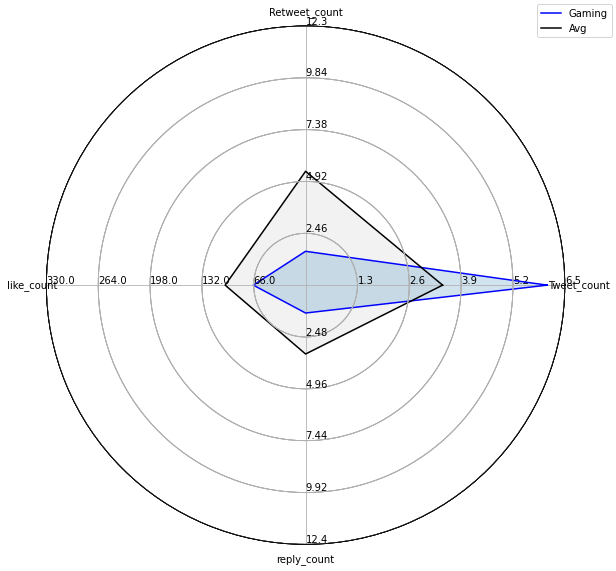

In [147]:
#Gaming
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[0], normalized_retweet[0], normalized_like[0], normalized_reply[0])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1, 'b', label = "Gaming")
radar.plot(data2, 'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2)

fig1.legend()

plt.show()

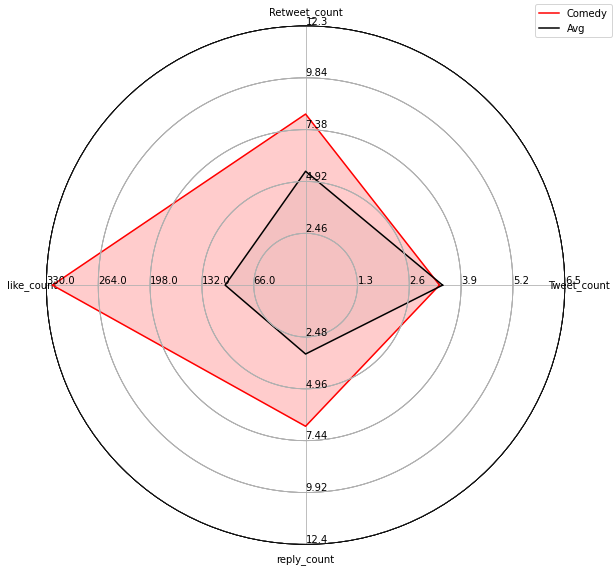

In [149]:
#Comedy
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[1], normalized_retweet[1], normalized_like[1], normalized_reply[1])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1, 'r', label = "Comedy")
radar.plot(data2, 'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2, color ="red")

fig1.legend()

plt.show()

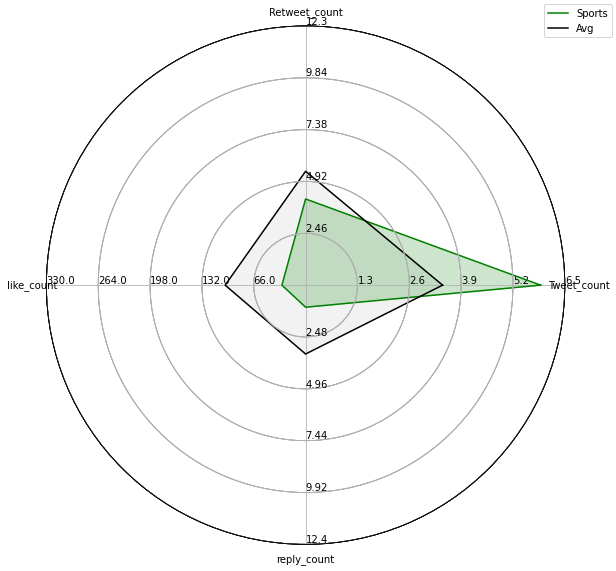

In [150]:
#Sports
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[2], normalized_retweet[2], normalized_like[2], normalized_reply[2])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1,'g', label = "Sports")
radar.plot(data2, 'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2, color ="green")

fig1.legend()

plt.show()

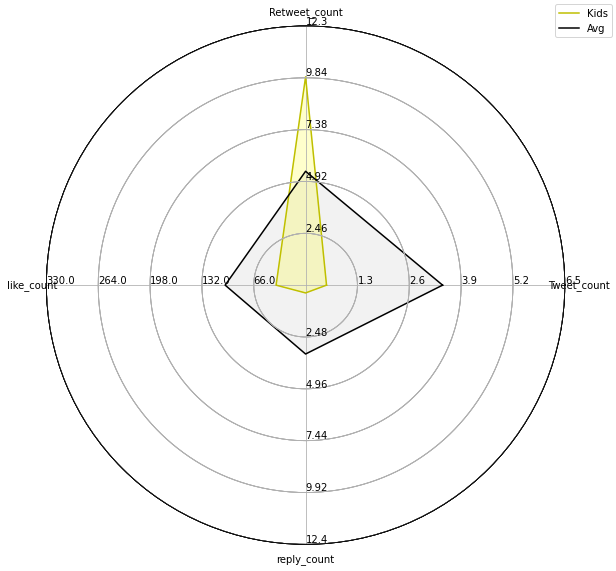

In [152]:
#Kids
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[3], normalized_retweet[3], normalized_like[3], normalized_reply[3])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1,'y', label = "Kids")
radar.plot(data2,'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2, color ="yellow")

fig1.legend()

plt.show()

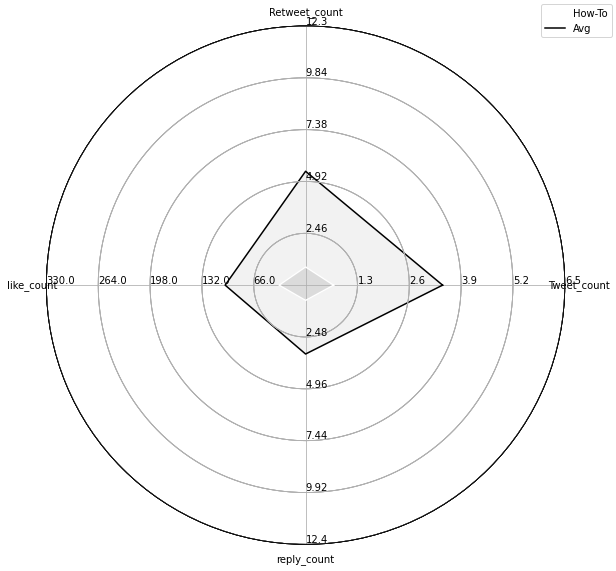

In [155]:
#How-To
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[4], normalized_retweet[4], normalized_like[4], normalized_reply[4])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1, 'w', label = "How-To")
radar.plot(data2, 'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2, color ="grey")

fig1.legend()

plt.show()

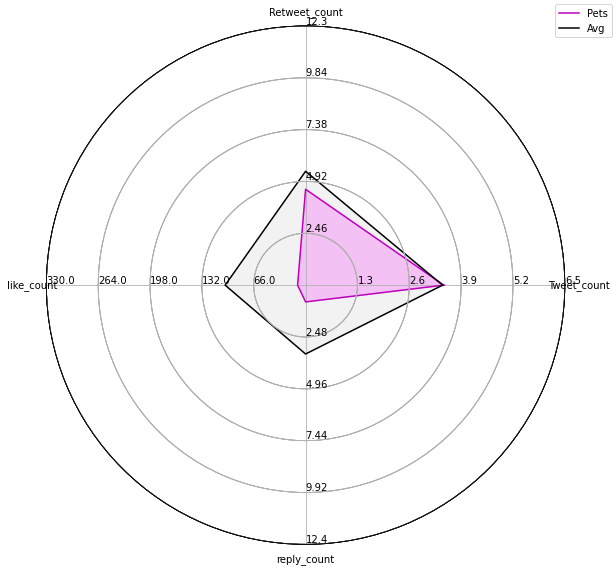

In [157]:
#Pets
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[5], normalized_retweet[5], normalized_like[5], normalized_reply[5])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1,'m', label = "Pets")
radar.plot(data2, 'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2, color ="magenta")

fig1.legend()

plt.show()

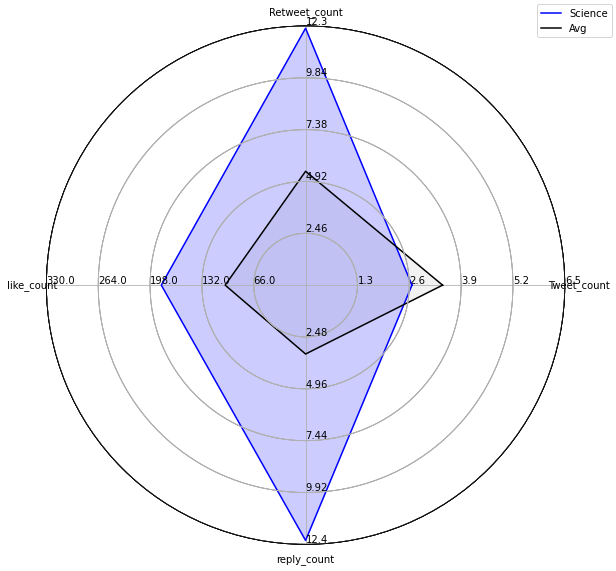

In [158]:
#Science
variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1 = (normalized_tweet[6], normalized_retweet[6], normalized_like[6], normalized_reply[6])
data2 = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1,'b', label = "Science")
radar.plot(data2, 'k', label = "Avg")
radar.fill(data2, alpha = 0.05, color= "black")
radar.fill(data1, alpha=0.2, color ="blue")

fig1.legend()

plt.show()

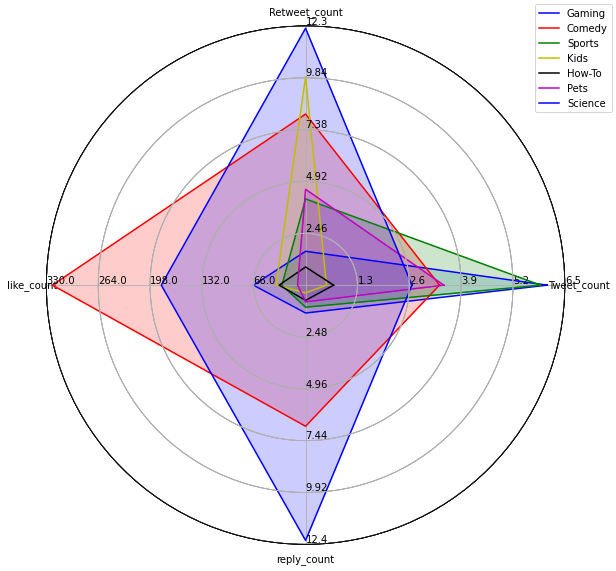

In [159]:
#all

variables = ("Tweet_count", "Retweet_count", "like_count", "reply_count")
data1=(normalized_tweet[0], normalized_retweet[0], normalized_like[0], normalized_reply[0])
data2=(normalized_tweet[1], normalized_retweet[1], normalized_like[1], normalized_reply[1])
data3=(normalized_tweet[2], normalized_retweet[2], normalized_like[2], normalized_reply[2])
data4=(normalized_tweet[3], normalized_retweet[3], normalized_like[3], normalized_reply[3])
data5=(normalized_tweet[4], normalized_retweet[4], normalized_like[4], normalized_reply[4])
data6=(normalized_tweet[5], normalized_retweet[5], normalized_like[5], normalized_reply[5])
data7=(normalized_tweet[6], normalized_retweet[6], normalized_like[6], normalized_reply[6])
avg = (range_tweet, range_retweet, range_like, range_reply)
# ranges
ranges = [(0, 6.5), (0, 12.3), (0, 330), (0, 12.4)]            
# plotting
fig1 = plt.figure(figsize=(8, 8))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1,'b', label = "Gaming")
radar.plot(data2,'r', label = "Comedy")
radar.plot(data3,'g', label = "Sports")
radar.plot(data4,'y', label = "Kids")
radar.plot(data5,'k', label = "How-To")
radar.plot(data6,'m', label = "Pets")
radar.plot(data7,'b', label = "Science")



radar.fill(data1, alpha=0.2)
radar.fill(data2, alpha=0.2, color ="red")
radar.fill(data3, alpha=0.2, color ="green")
radar.fill(data4, alpha=0.2, color ="yellow")
radar.fill(data5, alpha=0.2, color ="grey")
radar.fill(data6, alpha=0.2, color ="magenta")
radar.fill(data7, alpha=0.2, color ="blue")


fig1.legend()

plt.show()